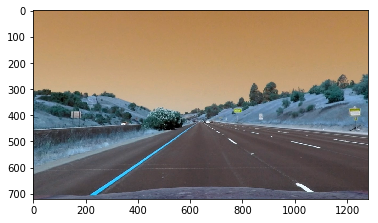

In [5]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import math
import pickle
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
#%matplotlib qt
%matplotlib inline



nx = 9
ny = 6
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img_cal_org = cv2.imread(fname)
    img_cal_gray = cv2.cvtColor(img_cal_org,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(img_cal_gray, (nx,ny),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        
        # Draw and display the corners
        img_cal_corner = cv2.drawChessboardCorners(img_cal_org, (nx,ny), corners, ret)
        write_name1 = '../output_images/camera_calibration/corners_found'+str(idx)+'.jpg'
        cv2.imwrite(write_name1, img_cal_corner)

# Extract the camera calibration results        
size_img = (1280, 720)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, size_img, None, None)        
        
# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "./wide_dist_pickle.p", "wb" ) )        
        
img_test_org = cv2.imread('../test_images/straight_lines1.jpg')
img_test_undist = cv2.undistort(img_test_org, mtx, dist, None, mtx)
write_name_test = '../output_images/output_straight_line1.jpg'
cv2.imwrite(write_name_test, img_test_undist)
plt.imshow(dst)

# Step through the liast and apply undistortion to each image
for idx, fname in enumerate(images):
    img_cal_org = cv2.imread(fname)
    img_cal_gray = cv2.cvtColor(img_cal_org,cv2.COLOR_BGR2GRAY)

    img_cal_undist = cv2.undistort(img_cal_corner, mtx, dist, None, mtx)
    write_name2 = '../output_images/camera_calibration/calibrated'+str(idx)+'.jpg'
    cv2.imwrite(write_name2, img_cal_undist)
